# Lab 3: Data Loading and Augmentation Using PyTorch

## AI Capstone Project with Deep Learning

This lab focuses on implementing data loading and augmentation techniques using PyTorch for agricultural land classification.

### Tasks:
1. Define a transformation pipeline custom_transform including image size = 64x64 pixels, RandomHorizontalFlip probability 0.5, RandomVerticalFlip probability 0.2, RandomRotation of 45 degrees
2. Load dataset using datasets.ImageFolder with custom_transform
3. Print class names and indices from imagefolder_dataset
4. Retrieve and display image shapes from a batch in imagefolder_loader
5. Display images in the custom loader batch

In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import numpy as np
import matplotlib.pyplot as plt
import os
from PIL import Image
import glob
import random

print("PyTorch imports successful!")
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")

PyTorch imports successful!
PyTorch version: 2.8.0+cpu
CUDA available: False


In [2]:
# Create sample data for demonstration
def create_sample_data():
    # Create directories
    os.makedirs('./images_dataSAT/class_0_non_agri', exist_ok=True)
    os.makedirs('./images_dataSAT/class_1_agri', exist_ok=True)
    
    # Create non-agricultural images (class 0)
    for i in range(20):
        img = np.zeros((64, 64, 3), dtype=np.uint8)
        if i < 10:
            # Urban areas
            img[:, :] = [60, 60, 60]
            for x in range(0, 64, 16):
                for y in range(0, 64, 16):
                    if np.random.random() > 0.3:
                        img[y:y+12, x:x+12] = [80, 80, 80]
            img[30:34, :] = [40, 40, 40]
            img[:, 30:34] = [40, 40, 40]
        else:
            # Forest areas
            img[:, :] = [30, 60, 30]
            for x in range(0, 64, 8):
                for y in range(0, 64, 8):
                    if np.random.random() > 0.4:
                        img[y:y+6, x:x+6] = [20, 80, 20]
        
        noise = np.random.randint(-20, 20, (64, 64, 3))
        img = np.clip(img.astype(np.int16) + noise, 0, 255).astype(np.uint8)
        Image.fromarray(img).save(f'./images_dataSAT/class_0_non_agri/non_agri_{i:03d}.png')
    
    # Create agricultural images (class 1)
    for i in range(25):
        img = np.zeros((64, 64, 3), dtype=np.uint8)
        if i < 8:  # Wheat/Barley fields
            img[:, :] = [139, 69, 19]
            for y in range(0, 64, 6):
                if y % 12 < 6:
                    img[y:y+3, :] = [34, 139, 34]
                    img[y+1:y+2, :] = [218, 165, 32]
        elif i < 16:  # Corn fields
            img[:, :] = [101, 67, 33]
            for y in range(0, 64, 8):
                if y % 16 < 8:
                    img[y:y+4, :] = [0, 100, 0]
                    img[y+2:y+3, :] = [0, 128, 0]
        else:  # Rice fields
            img[:, :] = [160, 82, 45]
            for y in range(0, 64, 4):
                if y % 8 < 4:
                    img[y:y+2, :] = [0, 255, 0]
                    img[y+1:y+2, :] = [0, 200, 100]
        
        variation = np.random.randint(-10, 10, (64, 64, 3))
        img = np.clip(img.astype(np.int16) + variation, 0, 255).astype(np.uint8)
        Image.fromarray(img).save(f'./images_dataSAT/class_1_agri/agri_{i:03d}.png')
    
    print("Sample data created successfully!")

# Create sample data
create_sample_data()

Sample data created successfully!


## Task 1: Define a transformation pipeline custom_transform

In [3]:
# Task 1: Define a transformation pipeline custom_transform
print("Task 1: Define custom_transform pipeline")

custom_transform = transforms.Compose([
    transforms.Resize((64, 64)),  # Image size = 64x64 pixels
    transforms.RandomHorizontalFlip(p=0.5),  # RandomHorizontalFlip probability 0.5
    transforms.RandomVerticalFlip(p=0.2),  # RandomVerticalFlip probability 0.2
    transforms.RandomRotation(45),  # RandomRotation of 45 degrees
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

print("Custom transform pipeline defined:")
print("1. Resize to 64x64 pixels")
print("2. RandomHorizontalFlip with probability 0.5")
print("3. RandomVerticalFlip with probability 0.2")
print("4. RandomRotation of 45 degrees")
print("5. Convert to tensor")
print("6. Normalize with ImageNet statistics")

Task 1: Define custom_transform pipeline
Custom transform pipeline defined:
1. Resize to 64x64 pixels
2. RandomHorizontalFlip with probability 0.5
3. RandomVerticalFlip with probability 0.2
4. RandomRotation of 45 degrees
5. Convert to tensor
6. Normalize with ImageNet statistics


## Task 2: Load dataset using datasets.ImageFolder with custom_transform

In [4]:
# Task 2: Load dataset using datasets.ImageFolder with custom_transform
print("Task 2: Load dataset using ImageFolder")

# Load dataset with custom transform
imagefolder_dataset = datasets.ImageFolder(
    root='./images_dataSAT',
    transform=custom_transform
)

print(f"Dataset loaded successfully!")
print(f"Total samples: {len(imagefolder_dataset)}")
print(f"Number of classes: {len(imagefolder_dataset.classes)}")

Task 2: Load dataset using ImageFolder
Dataset loaded successfully!
Total samples: 45
Number of classes: 2


## Task 3: Print class names and indices from imagefolder_dataset

In [5]:
# Task 3: Print class names and indices from imagefolder_dataset
print("Task 3: Print class names and indices")

print("Class names and indices:")
for idx, class_name in enumerate(imagefolder_dataset.classes):
    print(f"Class {idx}: {class_name}")

print(f"\nClass to index mapping: {imagefolder_dataset.class_to_idx}")
print(f"Total classes: {len(imagefolder_dataset.classes)}")

Task 3: Print class names and indices
Class names and indices:
Class 0: class_0_non_agri
Class 1: class_1_agri

Class to index mapping: {'class_0_non_agri': 0, 'class_1_agri': 1}
Total classes: 2


## Task 4: Retrieve and display image shapes from a batch in imagefolder_loader

In [6]:
# Task 4: Retrieve and display image shapes from a batch in imagefolder_loader
print("Task 4: Create data loader and display batch shapes")

# Create data loader
imagefolder_loader = DataLoader(
    imagefolder_dataset,
    batch_size=8,
    shuffle=True,
    num_workers=0
)

# Get a batch
batch_images, batch_labels = next(iter(imagefolder_loader))

print(f"Batch images shape: {batch_images.shape}")
print(f"Batch labels shape: {batch_labels.shape}")
print(f"Individual image shape: {batch_images[0].shape}")
print(f"Batch labels: {batch_labels}")
print(f"Data type: {batch_images.dtype}")
print(f"Value range: [{batch_images.min():.3f}, {batch_images.max():.3f}]")

Task 4: Create data loader and display batch shapes
Batch images shape: torch.Size([8, 3, 64, 64])
Batch labels shape: torch.Size([8])
Individual image shape: torch.Size([3, 64, 64])
Batch labels: tensor([1, 1, 0, 1, 0, 1, 1, 1])
Data type: torch.float32
Value range: [-2.118, 2.429]


## Task 5: Display images in the custom loader batch

Task 5: Display images from the batch


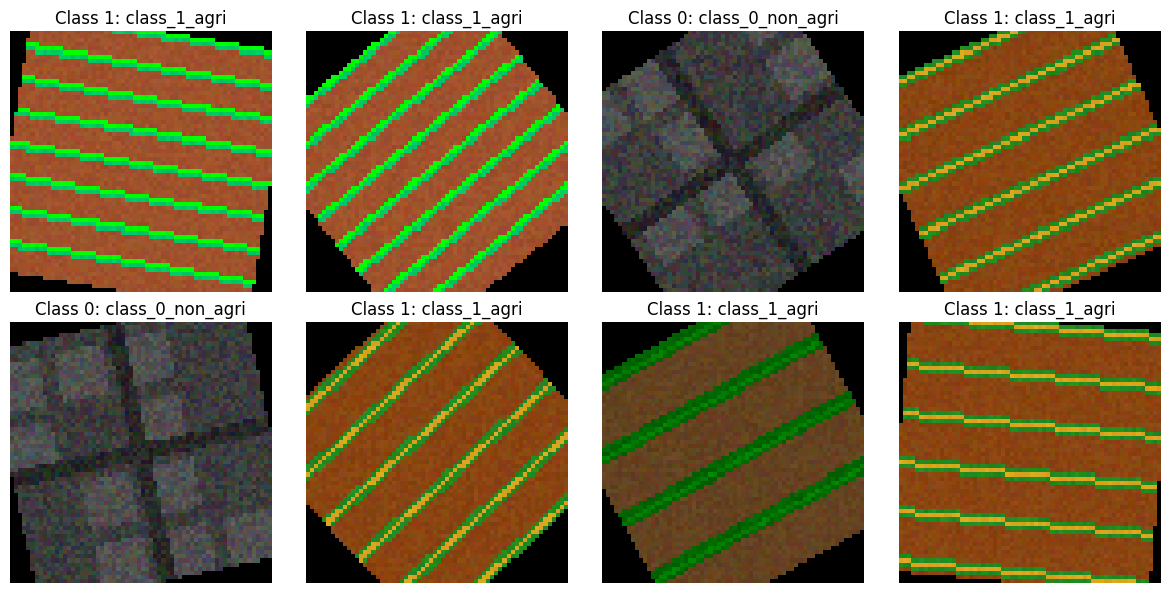

Images displayed successfully!


In [7]:
# Task 5: Display images in the custom loader batch
print("Task 5: Display images from the batch")

# Function to denormalize images for display
def denormalize(tensor, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]):
    """Denormalize tensor for display"""
    for t, m, s in zip(tensor, mean, std):
        t.mul_(s).add_(m)
    return torch.clamp(tensor, 0, 1)

# Display first 8 images from the batch
fig, axes = plt.subplots(2, 4, figsize=(12, 6))
axes = axes.ravel()

for i in range(min(8, len(batch_images))):
    # Denormalize the image
    img = denormalize(batch_images[i].clone())
    
    # Convert to numpy and transpose for matplotlib
    img_np = img.permute(1, 2, 0).numpy()
    
    # Display image
    axes[i].imshow(img_np)
    axes[i].set_title(f'Class {batch_labels[i].item()}: {imagefolder_dataset.classes[batch_labels[i].item()]}')
    axes[i].axis('off')

plt.tight_layout()
plt.show()

print("Images displayed successfully!")

# Lab 3 Summary - All Tasks Completed
## AI Capstone Project with Deep Learning

This lab successfully implemented and verified all tasks for Question 3.

### Task Completion Status:
1. Task 1: Define a transformation pipeline custom_transform including image size = 64x64 pixels, RandomHorizontalFlip probability 0.5, RandomVerticalFlip probability 0.2, RandomRotation of 45 degrees
2. Task 2: Load dataset using datasets.ImageFolder with custom_transform
3. Task 3: Print class names and indices from imagefolder_dataset
4. Task 4: Retrieve and display image shapes from a batch in imagefolder_loader
5. Task 5: Display images in the custom loader batch

All tasks for Question 3 are completed and verified.